# ÏïåÎ†§ÏßÑ ÌôïÎ•† Î∂ÑÌè¨

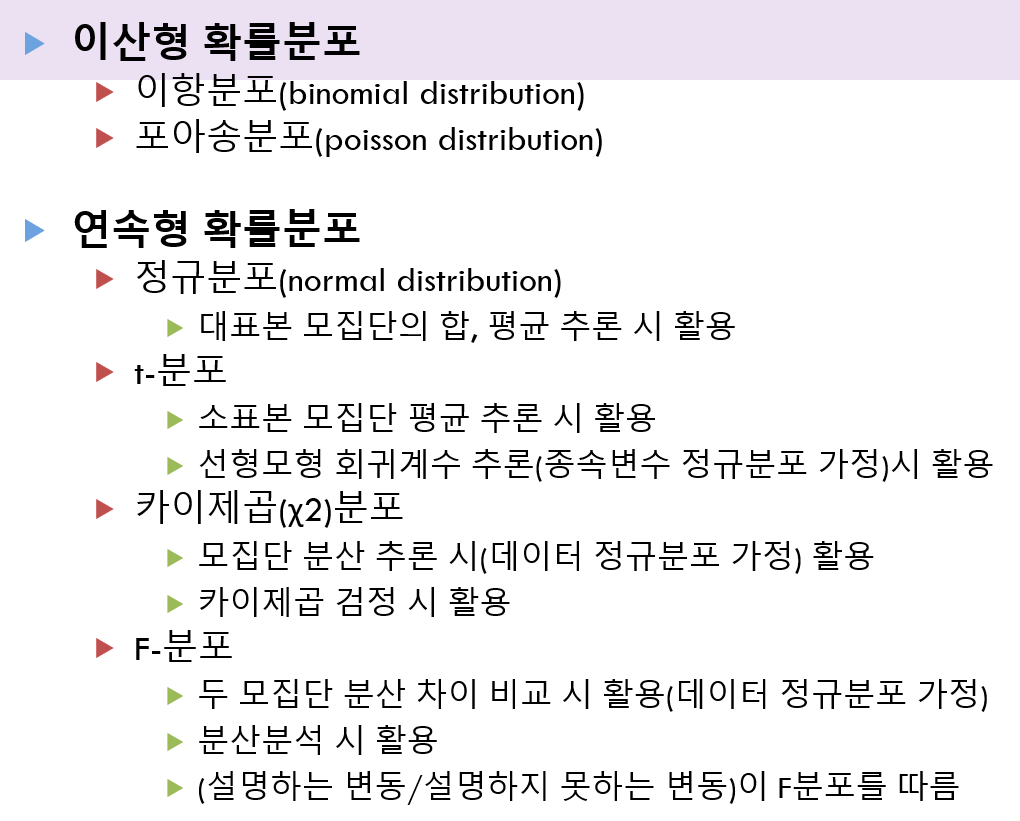

# ÎåÄÌëúÏ†ÅÏù∏ Ïù¥ÏÇ∞Ìòï ÌôïÎ•†Î∂ÑÌè¨

- Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨ => Ïù¥Ìï≠Î∂ÑÌè¨(binomial distribution)
- Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [4]:
# ÌïÑÏöî Ìï®Ïàò Ï†ïÏùò

# Í∑∏ÎûòÌîÑ ÏÑ†Ïùò Ï¢ÖÎ•ò
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# Í∏∞ÎåìÍ∞íÍ≥º Î∂ÑÏÇ∞ Í≥ÑÏÇ∞ Ìï®Ïàò

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
# Í∑∏ÎûòÌîÑ ÏûëÏÑ± Ìï®Ïàò

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

### Î≤†Î•¥ÎàÑÏù¥ ÏãúÌñâ
- ÏãúÌñâ ÎòêÎäî Ïã§ÌóòÏùò Í≤∞Í≥ºÍ∞Ä Îëê Í∞ÄÏßÄ (ÏÑ±Í≥µ(S), Ïã§Ìå®(F)) Ï§ë ÌïòÎÇòÏù∏ Í≤ΩÏö∞
    - Í∞Å ÏãúÌñâÏùò Í≤∞Í≥ºÎäî ÏÑ±Í≥µ(S)Í≥º Ïã§Ìå®(F) Ï§ë ÌïòÎÇòÎ°ú Î∂ÑÎ•òÌï† Ïàò ÏûàÎã§.
    - Í∞Å ÏãúÌñâÏóêÏÑú ÏÑ±Í≥µÏùò ÌôïÎ•†ÏùÄ ùëùÏù¥Îã§.
    - Í∞Å ÏãúÌñâÏùÄ ÏÑúÎ°ú ÎèÖÎ¶ΩÏù¥Îã§.
    
- Ïòà) ÎèôÏ†Ñ ÎçòÏßÄÍ∏∞
- Ïòà) 5Í∞úÏùò Î∂àÎüâÌíàÍ≥º 10Í∞úÏùò Ï†ïÏÉÅ Ï†úÌíà Ï§ëÏóêÏÑú ÏûÑÏúºÎ°ú ÌïòÎÇòÏî© Í∫ºÎÇº Îïå
        - Î≥µÏõêÏ∂îÏ∂úÏùò Í≤ΩÏö∞: Î∂àÎüâÌíàÏùò ÌôïÎ•†Ïù¥ 1/3Ïù∏ Î≤†Î•¥ÎàÑÏù¥ÏãúÌñâ
        - ÎπÑÎ≥µÏõêÏ∂îÏ∂úÏùò Í≤ΩÏö∞: Î≤†Î•¥ÎàÑÏù¥ ÏãúÌñâÏù¥ ÏïÑÎãò(why?)
            - Î∂àÎüâÌíàÏù¥ÎÇò Ï†ïÏÉÅÏ†úÌíàÏù¥ ÌïòÎÇòÏî© ÏÜåÎ©∏ÎêòÎØÄÎ°ú ÏÑ±Í≥µÍ≥º Ïã§Ìå®Ïùò ÌôïÎ•†Ïù¥ Î≥ÄÎèôÎê®


### Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨ 

-  ÌôïÎ•†Î≥ÄÏàòÍ∞Ä Ï∑®Ìï† Ïàò ÏûàÎäî Í∞íÏù¥ 0Í≥º 1Î∞ñÏóê ÏóÜÎäî Î∂ÑÌè¨
    - Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÌôïÎ•†Î≥ÄÏàòÏùò ÏãúÌñâÏù¥ Î≤†Î•¥ÎàÑÏù¥ ÏãúÌñâ
    - 1ÏùÄ ÏÑ±Í≥µ, 0ÏùÄ Ïã§Ìå®
    - 1Ïù¥ ÎÇòÏò§Îäî ÌôïÎ•†ÏùÄ ùëù, 0Ïù¥ ÎÇòÏò§Îäî ÌôïÎ•†ÏùÄ 1‚àíùëù
    - ÌååÎùºÎØ∏ÌÑ∞ ùëùÏù∏ Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨Îäî Bern(ùëù)
    
    
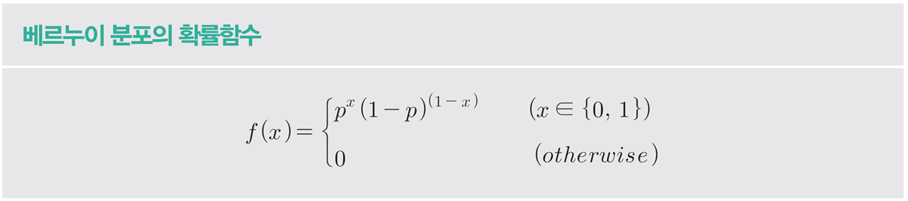
    


- ÎèôÏ†ÑÏùÑ ÎçòÏ†∏ ÏïûÎ©¥Ïù¥ ÎÇòÏò¨ ÌôïÎ•†

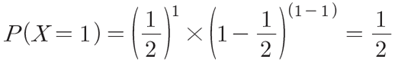


- Ï£ºÏÇ¨ÏúÑÎ•º Ìïú Î≤à Íµ¥Î†§ 6Ïù¥ ÎÇòÏò§ÏßÄ ÏïäÏùÑ ÌôïÎ•†
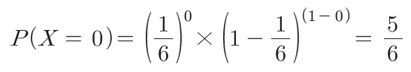

## Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨Î•º Ìï®ÏàòÎ°ú Íµ¨ÏÑ±

In [6]:
 # 1Ïù¥ ÎÇòÏò¨ ÌôïÎ•†


In [7]:
X # 1Ïù¥ ÎÇòÏò¨ ÌôïÎ•†Ïù¥ 0.3Ïù∏ Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨ Ìï®Ïàò

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [13]:
 # Ïã§Ìå®Ìï† ÌôïÎ•†
 # ÏÑ±Í≥µÌï† ÌôïÎ•†

0.300

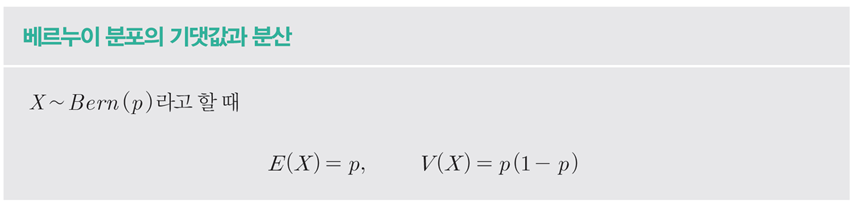

In [14]:
# Í∏∞ÎåìÍ∞íÍ≥º Î∂ÑÏÇ∞ Í≥ÑÏÇ∞


expected value 0.3
variance 0.21


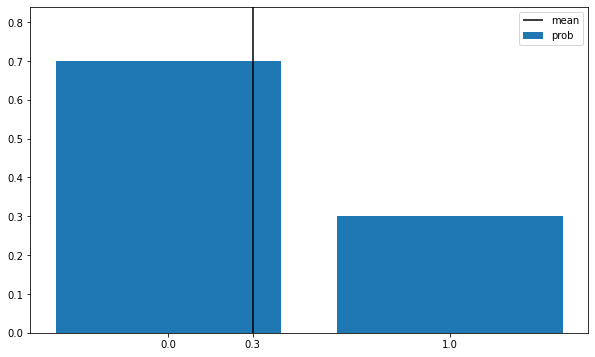

In [15]:
# ÌèâÍ∑†Í≥º ÌôïÎ•†Î∂ÑÌè¨(ÌôïÎ•†Ïùò Î©¥Ï†Å-Î∂ÑÏÇ∞)ÏôÄÏùò Í¥ÄÍ≥Ñ


# scipy.stats Î™®Îìà

- SciPyÎäî Í∞ÅÏ¢Ö ÏàòÏπò Ìï¥ÏÑù Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïòÎäî ÌååÏù¥Ïç¨ Ìå®ÌÇ§ÏßÄ

    - SciPyÎäî Ïó¨Îü¨Í∞úÏùò ÏÑúÎ∏å Ìå®ÌÇ§ÏßÄÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎäîÎç∞ Í∑∏ Ï§ë scipy.stats ÏÑúÎ∏åÌå®ÌÇ§ÏßÄÎäî Ïó¨Îü¨Í∞ÄÏßÄ ÌôïÎ•† Î∂ÑÌè¨ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Í∏∞Îä•ÏùÑ Ï†úÍ≥µ
    
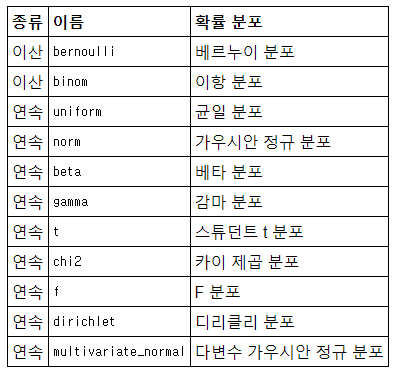

In [1]:
# Ïù∏ÏàòÎ°ú ÌôïÎ•† ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∑®ÌïòÍ≥† Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨Î•º Îî∞Î•¥Îäî objectÎ•º Î∞òÌôòÌï®
# rvÎäî ÌôïÎ•†Î≥ÄÏàòÏóê Ìï¥Îãπ Ìï®


In [17]:
# 0Ïù¥ ÎÇòÏò¨ ÌôïÎ•†, 1Ïù¥ ÎÇòÏò¨ ÌôïÎ•†
# pmf Î©îÏÑúÎìú : ÌôïÎ•†ÏßàÎüâÌï®Ïàò Í≥ÑÏÇ∞ Í∞ÄÎä•


(0.700, 0.300)

In [18]:
# Ïù∏ÏàòÎ°ú Î¶¨Ïä§Ìä∏Î•º ÎÑòÍ∏∏ Ïàò ÏûàÏùå


array([0.7, 0.3])

In [20]:
# cdf ÎàÑÏ†Å Î∞ÄÎèÑ Ìï®ÏàòÎ•º Í≥ÑÏÇ∞

# 0Ïù¥ÎÇòÏò¨ ÌôïÎ•†, 0Ïù¥ÎÇò 1Ïù¥ ÎÇòÏò¨ ÌôïÎ•†

array([0.7, 1. ])

In [21]:
# Í∏∞ÎåìÍ∞íÍ≥º Î∂ÑÏÇ∞ Í≥ÑÏÇ∞


(0.300, 0.210)

### Î≤†Î•¥ÎàÑÏù¥Î∂ÑÌè¨ Ï†ïÎ¶¨

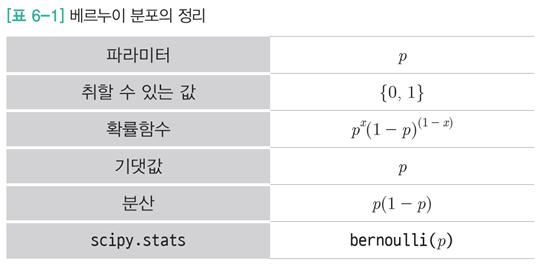

## Ïù¥Ìï≠Î∂ÑÌè¨

- ÏÑ±Í≥µÌôïÎ•†Ïù¥ Œº Ïù∏ Î≤†Î•¥ÎàÑÏù¥ ÏãúÌñâÏùÑ NÎ≤à Î∞òÎ≥µÌïòÎäî Í≤ΩÏö∞Î•º ÏÉùÍ∞ÅÌï¥Î≥¥Ïûê. 

    - Í∞ÄÏû• Ïö¥Ïù¥ Ï¢ãÏùÑ ÎïåÏóêÎäî NÎ≤à Î™®Îëê ÏÑ±Í≥µÌï† Í≤ÉÏù¥Í≥† Í∞ÄÏû• Ïö¥Ïù¥ ÎÇòÏÅú Í≤ΩÏö∞ÏóêÎäî Ìïú Î≤àÎèÑ ÏÑ±Í≥µÌïòÏßÄ Î™ªÌï† Í≤ÉÏù¥Îã§. 

    - NÎ≤à Ï§ë ÏÑ±Í≥µÌïú ÌöüÏàòÎ•º ÌôïÎ•†Î≥ÄÏàò XÎùºÍ≥† ÌïúÎã§Î©¥ XÏùò Í∞íÏùÄ 0 Î∂ÄÌÑ∞ N ÍπåÏßÄÏùò Ï†ïÏàò Ï§ë ÌïòÎÇòÍ∞Ä Îê† Í≤ÉÏù¥Îã§.

- Ïù¥Îü∞ ÌôïÎ•†Î≥ÄÏàòÎ•º **Ïù¥Ìï≠Î∂ÑÌè¨(binomial distribution)**Î•º Îî∞Î•¥Îäî ÌôïÎ•†Î≥ÄÏàòÎùºÍ≥† ÌïòÎ©∞ Îã§ÏùåÍ≥º Í∞ôÏù¥ ÌëúÏãúÌïúÎã§.
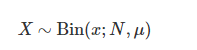

    - ùëã= ÏÑ±Í≥µÏùò ÌôïÎ•†Ïù¥ ùëùÏù∏ Î≤†Î•¥ÎàÑÏù¥ ÏãúÌñâÏùÑ ùëõÎ≤à Î∞òÎ≥µÌï† Îïå ÏÑ±Í≥µÏùò ÏàòÍ∞Ä Îî∞Î•¥Îäî Î∂ÑÌè¨

    - ùëãÍ∞Ä Í∞ÄÏßà Ïàò ÏûàÎäî Í∞í: 0, 1, 2, ‚Ä¶, ùëõ
    - nÎ≤à ÎçòÏ†∏ÏÑú xÎ≤à ÏÑ±Í≥µÌï† ÌôïÎ•†
    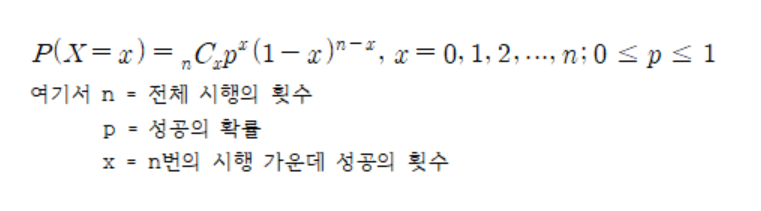

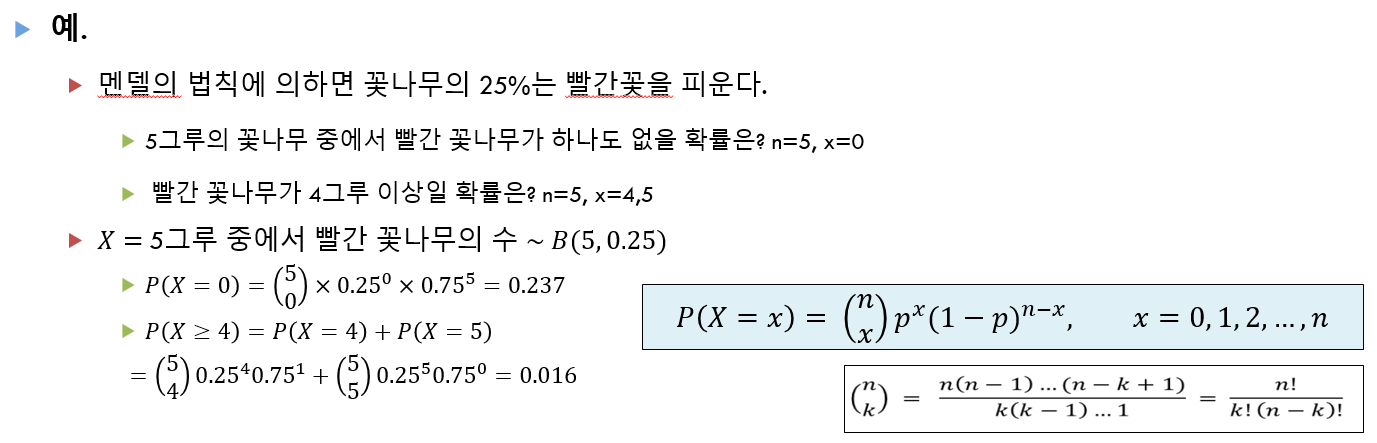

![](Ï°∞Ìï©nck.png)

### ÏúÑ Ïó∞ÏÇ∞ÏùÑ Ïã§ÌñâÌïòÎäî Ìï®Ïàò : comb 

## ÏàòÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥Ìï≠Î∂ÑÌè¨ Ìï®Ïàò ÏÉùÏÑ±

In [22]:

print(com)

(5*4*3*2*1)/(2*1*(3*2*1))

10.0


10.000

In [23]:
from scipy.special import comb

print(com)
# 5Í∞úÏ§ë 0Í∞úÎ•º Í≥†Î•¥Îäî Î∞©Î≤ïÏùò ÏàòÎäî 1

1.0


In [26]:
from scipy.special import comb

print(com)
(5*4*3*2*1)/(4*3*2*1)*(1)
# 5Í∞úÏ§ë 4Í∞úÎ•º Í≥†Î•¥Îäî Î∞©Î≤ïÏùò ÏàòÎäî 5

5.0


5.000

In [27]:
from scipy.special import comb



In [40]:
### Î©òÎç∏Ïùò Î≤ïÏπôÏóê ÏùòÌïòÎ©¥ ÍΩÉÎÇòÎ¨¥Ïùò 25%Îäî Îπ®Í∞ÑÍΩÉÏùÑ ÌîºÏö¥Îã§. 
# 5Í∑∏Î£®Ïùò ÍΩÉÎÇòÎ¨¥Í∞Ä ÏûàÏùÑÎïå



In [41]:
#  Îπ®Í∞Ñ ÍΩÉÎÇòÎ¨¥Í∞Ä ÌïòÎÇòÎèÑ ÏóÜÏùÑ ÌôïÎ•†ÏùÄ? n=5, x=0


0.237

In [42]:
# Îπ®Í∞Ñ ÍΩÉÎÇòÎ¨¥Í∞Ä 4Í∑∏Î£® Ïù¥ÏÉÅÏùº ÌôïÎ•†ÏùÄ? n=5, x=4,5


0.016

In [43]:
# ÌôïÎ•†Î≥ÄÏàò XÏóê ÎåÄÌïú Í∏∞ÎåÄÍ∞í Î∞è Î∂ÑÏÇ∞


expected value 1.25
variance 0.9375


In [33]:
# ÍΩÉÎÇòÎ¨¥Îäî 10Í∑∏Î£®Ïù¥Í≥† Îπ®Í∞ÑÍΩÉÏùÑ ÌïÑ ÌôïÎ•†Ïù¥ 0.3Ïù¥ÎùºÍ≥† Ìï†Îïå


In [34]:
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [35]:
# ÌôïÎ•†Î≥ÄÏàò XÏùò Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞ÏùÄ


expected value 3.0
variance 2.1


In [37]:
# Î™®Îì† ÌôïÎ•†Ïùò Ìï©ÏùÄ 1

[ 0  1  2  3  4  5  6  7  8  9 10] <function Bin.<locals>.f at 0x0000023B11CF1160>
[2.825e-02 1.211e-01 2.335e-01 2.668e-01 2.001e-01 1.029e-01 3.676e-02
 9.002e-03 1.447e-03 1.378e-04 5.905e-06]


1.000

In [38]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

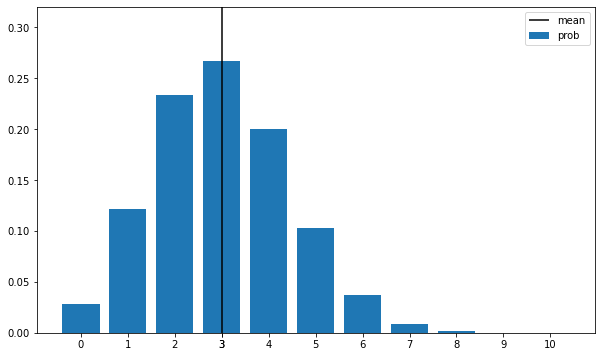

In [39]:
plot_prob(X)

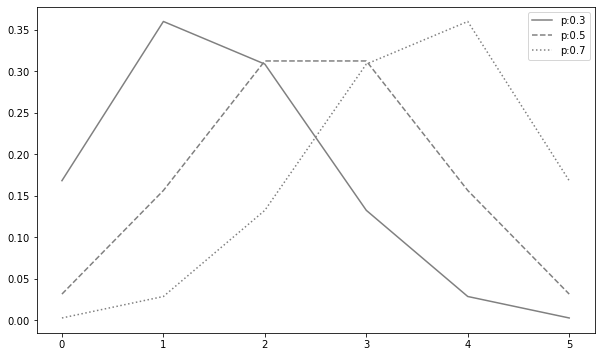

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)

# ÏÑ±Í≥µÌôïÎ•† 0.3, 0.5, 0.7 ÏùºÎïå ÎπÑÍµê



ax.set_xticks(x_set)
ax.legend()

plt.show()

# Í∑∏ÎûòÌîÑ Î™®ÏñëÏù¥ Ï¢ÖÎ™®Ïñë

### Ïù¥Ìï≠Î∂ÑÌè¨ Î™®Ïñë
- ÏÑ±Í≥µÌôïÎ•†Ïù¥ 0.5Ïóê Í∞ÄÍπåÏö∞Î©¥ ÏãúÌñâÌöåÏàò nÏùò ÌÅ¨Í∏∞Ïóê Í¥ÄÍ≥Ñ ÏóÜÏù¥ Ï¢åÏö∞ÎåÄÏπ≠ Ï¢ÖÎ™®ÏñëÏùÑ Ìï®
- ÏãúÌñâÌöåÏàò nÏù¥ ÌÅ¨Î©¥ ÏÑ±Í≥µÌôïÎ•†Ïùò ÌÅ¨Í∏∞Ïóê Í¥ÄÍ≥ÑÏóÜÏù¥ Ïù¥Ìï≠Î∂ÑÌè¨Îäî Ï¢åÏö∞ÎåÄÏπ≠ÏùÑ Ïù¥Î£∏
- ÏÑ±Í≥µÌôïÎ•†Ïù¥ 0.5Î≥¥Îã§ ÏûëÏúºÎ©¥ Ïò§Î•∏Ï™Ω Íº¨Î¶¨Î∂ÑÌè¨
- ÏÑ±Í≥µÌôïÎ•†Ïù¥ 0.5Î≥¥Îã§ ÌÅ¨Î©¥ ÏôºÏ™ΩÍº¨Î¶¨Î∂ÑÌè¨

### ÌååÏù¥Ïç¨ scipy Î™®ÎìàÏùò stats.binom Ìï®Ïàò ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥Ìï≠ÌôïÎ•†Î≥ÄÏàò ÏÉùÏÑ±

- stats.binom(ÏãúÌñâÌöüÏàò, ÏÑ±Í≥µÌôïÎ•†)

In [45]:
# ÏÑ±Í≥µÌôïÎ•† 0.6Ïù∏ Î≤†Î•¥ÎàÑÏù¥ ÏãúÌñâÏùÑ 10Î≤à Î∞òÎ≥µ ÌñàÏùÑ ÎïåÏùò ÏÑ±Í≥µ ÌöüÏàòÏùò ÌôïÎ•†Î≥ÄÏàò : rv



In [48]:
xx = np.arange(N + 1)
 
# 10Î≤à ÎçòÏ†∏ÏÑú ÌïúÎ≤àÎèÑ ÏÑ±Í≥µÌïòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞, 10Î≤à ÎçòÏ†∏ÏÑú 1Î≤à ÏÑ±Í≥µÌï† Í≤ΩÏö∞, 10Î≤à ÎçòÏ†∏ÏÑú 2Î≤à ÏÑ±Í≥µÌï† Í≤ΩÏö∞ ...

# 10Î≤à ÎçòÏ†∏ÏÑú ÌïúÎ≤àÎèÑ ÏÑ±Í≥µÌïòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞Ïùò ÌôïÎ•†, 10Î≤à ÎçòÏ†∏ÏÑú 1Î≤à ÏÑ±Í≥µÌï† Í≤ΩÏö∞Ïùò ÌôïÎ•†, 10Î≤à ÎçòÏ†∏ÏÑú 2Î≤à ÏÑ±Í≥µÌï† Í≤ΩÏö∞Ïùò ÌôïÎ•† ...


[ 0  1  2  3  4  5  6  7  8  9 10]
[1.049e-04 1.573e-03 1.062e-02 4.247e-02 1.115e-01 2.007e-01 2.508e-01
 2.150e-01 1.209e-01 4.031e-02 6.047e-03]


1.000

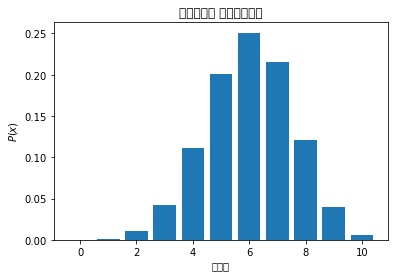

In [53]:
xx = np.arange(N + 1)

plt.xlabel("ÌëúÎ≥∏Í∞í")
plt.ylabel("$P(x)$")
plt.title("Ïù¥Ìï≠Î∂ÑÌè¨Ïùò ÌôïÎ•†ÏßàÎüâÌï®Ïàò")
plt.show()

### rvsÌï®Ïàò

- binom.rvs Ìï®ÏàòÎäî Ïù¥Ìï≠Î∂ÑÌè¨Î°ú Î∂ÄÌÑ∞ ÎÇúÏàòÎ•º ÏÉùÏÑ±ÏãúÌÇ¥

- Ïù∏Ïûê: n, p, size, random_state



In [54]:
from scipy.stats import binom

#Ïù¥Ìï≠Î∂ÑÌè¨Ïùò ÎûúÎç§ÎÇúÏàò Íµ¨ÌïòÍ∏∞: Í∞ôÏùÄ ÏΩîÎìú Îã§Î•∏ ÎÇúÏàò(!Ï£ºÏùò)
 #Í≤∞Í≥ºÎäî 
 #Í≤∞Í≥ºÎäî

[19 25 21]
[19 27 20]


In [55]:
#random_stateÏùÑ Ïù¥Ïö©Ìïú Ï¥àÍ∏∞Í∞íÍ≥†Ï†ï: Í∞ôÏùÄ ÏΩîÎìú Í∞ôÏùÄ ÎÇúÏàò
 #Í≤∞Í≥ºÎäî

 #Í≤∞Í≥ºÎäî


[25 27 23]
[25 27 23]


In [56]:
# rvs() Î©îÏÑúÎìúÎ°ú Î¨¥ÏûëÏúÑ ÌëúÎ≥∏ÏùÑ ÎΩëÏïÑÎÇ¥Îäî ÏãúÎÆ¨Î†àÏù¥ÏÖòÏùÑ Ìïú Í≤∞Í≥º
# ÏÉùÏÑ±ÎêòÎäî ÎÇúÏàòÍ∞Ä Ïù¥Ìï≠Î∂ÑÌè¨Î•º ÎùàÎã§

len(x)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

C:\Users\student\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarn

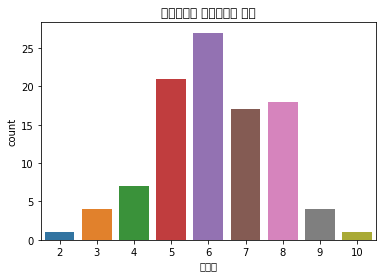

In [57]:
import seaborn as sns

plt.title("Ïù¥Ìï≠Î∂ÑÌè¨Ïùò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º")
plt.xlabel("ÌëúÎ≥∏Í∞í")
plt.show()

## Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨

- Îã®ÏúÑ ÏãúÍ∞Ñ ÏïàÏóê Ïñ¥Îñ§ ÏÇ¨Í±¥Ïù¥ Î™á Î≤à Î∞úÏÉùÌï† Í≤ÉÏù∏ÏßÄÎ•º ÌëúÌòÑÌïòÎäî Ïù¥ÏÇ∞ ÌôïÎ•† Î∂ÑÌè¨Ïù¥Îã§.

- ÏùºÏ†ïÌïú Îã®ÏúÑÏãúÍ∞Ñ, Îã®ÏúÑÍ±∞Î¶¨, Îã®ÏúÑÎ©¥Ï†ÅÍ≥º Í∞ôÏùÄ Ïñ¥Îñ§ Íµ¨Í∞ÑÏóêÏÑú Ïñ¥Îñ§ ÏÇ¨Í±¥Ïù¥ ÎûúÎç§ÌïòÍ≤å Î∞úÏÉùÌïòÎäî Í≤ΩÏö∞


    - ùëã= ÏùºÏ†ïÌïú Íµ¨Í∞ÑÏóêÏÑú Îã§Ïùå Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî ÌäπÏ†ïÌïú ÏÇ¨Í±¥Ïùò Î∞úÏÉù ÌöüÏàò
    - ÏïÑÏ£º ÏßßÏùÄ Íµ¨Í∞ÑÏóêÏÑúÎäî ÏÇ¨Í±¥Ïù¥ 2Ìöå Ïù¥ÏÉÅ Î∞úÏÉùÌï† ÌôïÎ•†ÏùÄ 0Ïóê Í∞ÄÍπùÎã§.
    - ÏïÑÏ£º ÏßßÏùÄ Íµ¨Í∞ÑÏóêÏÑú ÏÇ¨Í±¥Ïù¥ Î∞úÏÉùÌï† ÌôïÎ•†ÏùÄ Íµ¨Í∞ÑÏùò Í∏∏Ïù¥Ïóê ÎπÑÎ°ÄÌïúÎã§.
    - ÏÑúÎ°ú Í≤πÏπòÏßÄ ÏïäÎäî Îëê Íµ¨Í∞ÑÏóêÏÑú Î∞úÏÉùÌïòÎäî ÏÇ¨Í±¥Ïùò ÏàòÎäî ÏÑúÎ°ú ÎèÖÎ¶ΩÏù¥Îã§.
    - Íµ¨Í∞ÑÎßàÎã§ ÌôïÎ•†Î∂ÑÌè¨Îäî ÏùºÏ†ïÌïòÎã§.
    
    
-  Ïòà.
    - 119 Íµ¨Ï°∞ÎåÄÏóê Í±∏Î†§Ïò§Îäî ÏãúÍ∞Ñ Îãπ Ï†ÑÌôî ÌöüÏàò
    - 1ÎÖÑ ÎèôÏïà Î∞úÏÉùÌïòÎäî ÏßÑÎèÑ 4 Ïù¥ÏÉÅÏùò ÏßÄÏßÑ ÌöüÏàò
    - ÌîÑÎü¨ÏãúÏïÑ Í∏∞Î≥ë Ï§ëÏóêÏÑú Îß§ÎÖÑ ÎßêÏóê Ï∞®Ïó¨ ÏÇ¨ÎßùÌïòÎäî Î≥ëÏÇ¨Ïùò Ïàò
    - Ìïú ÏïºÍµ¨Í≤ΩÍ∏∞ÏóêÏÑú Ïã§Ï±ÖÏùò Ïàò
    - ÏÑúÏö∏ÏßÄÏó≠Ïùò 5Ïõî Ï§ë Î∂ÄÎèÑÎ•º ÎÇ∏ Ï§ëÏÜåÍ∏∞ÏóÖ Ïàò


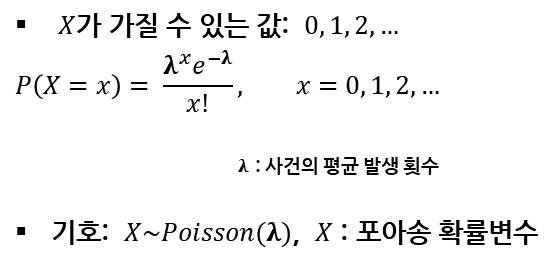

![](Ìè¨ÏïÑÏÜ°Ïãù.png)

![](Ìè¨ÏïÑÏÜ°ÏòàÏ†ú.png)

#### Ìïú ÏãúÍ∞ÑÎãπ ÌèâÍ∑† 10Î≤à access ÌïòÎäî ÏÇ¨Ïù¥Ìä∏ÏóêÏÑú ÏãúÍ∞ÑÎãπ 15Í±¥ access Ìï† ÌôïÎ•†

-5.313583114618023e-08

In [53]:
# Ìé∏ÏùòÏÉÅ x_setÏùÑ 0Ïù¥ÏÉÅ 19Ïù¥ÌïòÏù∏ Ï†ïÏàòÎ°ú Í∞ÄÏ†ï

from scipy.special import factorial



In [54]:
lam = 10 # ÌèâÍ∑† Î∞úÏÉù ÌöüÏàò


-25.779655901298145

In [39]:
print(x_set) 


# ÌèâÍ∑† Î∞úÏÉù ÌöüÏàòÍ∞Ä 3Î≤àÏù∏ ÏÉÅÌô©ÏóêÏÑú 0 Î≤à Î∞úÏÉù ÌôïÎ•†, 1Î≤à Î∞úÏÉù ÌôïÎ•† 2Î≤à Î∞úÏÉùÌôïÎ•† 3Î≤à Î∞úÏÉùÌôïÎ•†
prob

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


array([4.979e-02, 1.494e-01, 2.240e-01, 2.240e-01, 1.680e-01, 1.008e-01,
       5.041e-02, 2.160e-02, 8.102e-03, 2.701e-03, 8.102e-04, 2.210e-04,
       5.524e-05, 1.275e-05, 2.732e-06, 5.463e-07, 1.024e-07, 1.808e-08,
       3.013e-09, 4.757e-10])

expected value 3.0
variance 3.0


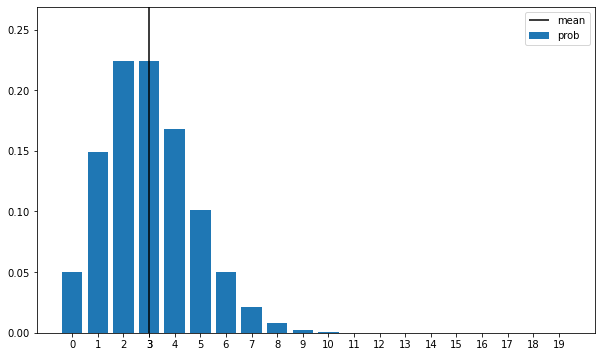

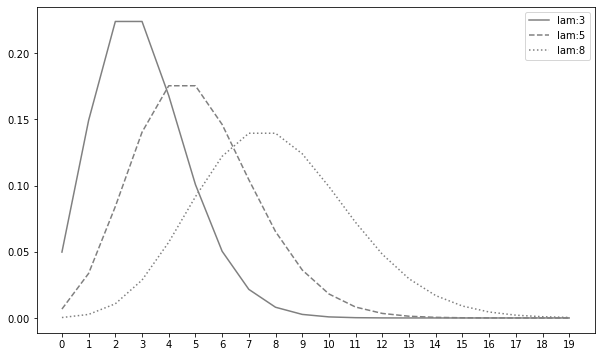

In [113]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)

ax.set_xticks(x_set)
ax.legend()

plt.show()